### Value at Risk (VaR) - Conditional Value at Risk (CVaR) - Bootstrapping

This notebook shows how to compute the VaR and the CVaR on P/L data

##### 1. VaR - CVaR

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

Load timeseries from a CSV file:

In [8]:
timeseries_df = pd.read_csv('data/citigroup.csv', sep = ',')
timeseries_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,490.000000,490.000000,482.000000,482.700012,313.317932,1474660
1,2005-01-04,482.799988,487.700012,477.000000,478.600006,310.656616,1584770
2,2005-01-05,480.500000,487.799988,480.200012,484.600006,314.551300,1893350
3,2005-01-06,488.000000,492.399994,487.399994,489.299988,317.601929,1804990
4,2005-01-07,491.000000,491.100006,486.000000,486.500000,315.784424,1280370


Extract close prices:

In [9]:
close_prices_df = timeseries_df["Close"]
close_prices_df.head()

0    482.700012
1    478.600006
2    484.600006
3    489.299988
4    486.500000
Name: Close, dtype: float64

Compute Daily P/L and remove 1st row (= NaN)

In [10]:
profit_loss = close_prices_df.diff(1).iloc[1:].rename('P/L')
profit_loss.head()

1   -4.100006
2    6.000000
3    4.699982
4   -2.799988
5   -3.100006
Name: P/L, dtype: float64

Set the confidence level.

In [11]:
epsilon = 0.01

Plot relative frequency histogram of the P/L data (and the corresponding normal distribution):

-0.41312128628230615 6.984884186713552


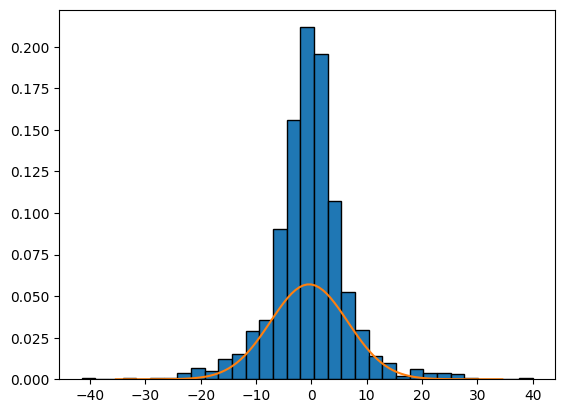

In [12]:
def plot_histo(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(data, bins=33, edgecolor='black', weights=np.ones_like(data) / len(data))

    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

    plt.show()

plot_histo(profit_loss)

Define the value_at_risk function.

With sorted P/L vector, the VaR corresponds the 100*(1-epsilon) percentile.  
Therefore the VaR is at index : `math.floor(epsilon * arr_size)`

In [13]:
def value_at_risk(pl_data, epsilon):
    sorted_pl = sorted(pl_data)
    arr_size = len(sorted_pl)
    var_index = math.floor(epsilon * arr_size)
    return -1.0 * sorted_pl[var_index]

var = value_at_risk(profit_loss, epsilon)
print('Value at Risk =', round(var, 2))

Value at Risk = 20.8


Define the conditional_value_at_risk function.

With sorted P/L vector, the CVaR is the expected value of the tail of the P/L data up to the VaR.  
Therefore the CVaR is the mean value of the data with index from 0 to the VaR index.

In [14]:
def conditional_value_at_risk(pl_data, epsilon):
    sorted_pl = sorted(pl_data)
    arr_size = len(sorted_pl)
    var_index = math.floor(epsilon * arr_size) + 1
    return float(np.mean(sorted_pl[1:var_index]))

cvar = conditional_value_at_risk(profit_loss, epsilon)
print('Conditional Value at Risk =', round(cvar, 2))

Conditional Value at Risk = -24.37


##### 2. Bootstrapped Var & CVaR

The bootstrapping method consists in randomly sampling from the P/L data, and computing the VaR and CVaR on the sample.

Random sample:

In [15]:
nb_scenarios = 500
random_indices = stats.randint.rvs(1, profit_loss.size, size = nb_scenarios)
bootstrapped_data = profit_loss[random_indices]
bootstrapped_data.head()

488    11.399994
427     3.100006
254     2.400024
223     4.700012
487    -0.699982
Name: P/L, dtype: float64

Plot the bootstrapped data distribution:

-0.6017989339999987 7.229955335960613


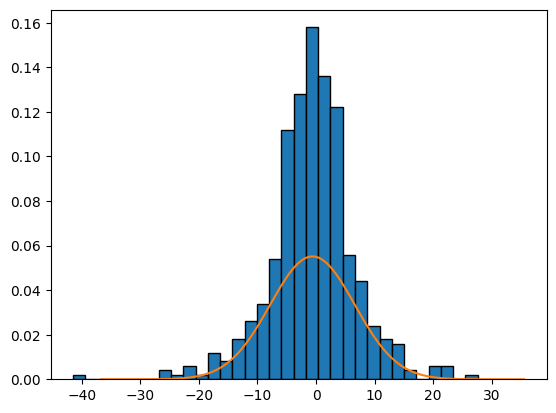

In [16]:
plot_histo(bootstrapped_data)

Compute the bootstrapped VaR:

In [19]:
bootstrapped_var = value_at_risk(bootstrapped_data, epsilon)
print('Bootstrapped Value at Risk =', round(bootstrapped_var, 2))

Bootstrapped Value at Risk = 21.2


Compute the bootstrapped CVaR:

In [20]:
bootstrapped_cvar = conditional_value_at_risk(bootstrapped_data, epsilon)
print('Bootstrapped Conditional Value at Risk =', round(bootstrapped_cvar, 2))

Bootstrapped Conditional Value at Risk = -23.72
